In [67]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import sys
import cv2
import json
import matplotlib.patches as patches
from PIL import Image

In [54]:
def poly2bbox(poly,image_size):
    x, y = [],[]
    for v in poly:
        x.append(v[0])
        y.append(v[1])
    x = np.sort(np.unique(x))
    y = np.sort(np.unique(y))
    
    x1 = np.min(x)/image_size
    x2 = np.max(x)/image_size
    y1 = np.min(y)/image_size
    y2 = np.max(y)/image_size
    w = x2 - x1
    h = y2 - y1

    return x1,y1,w,h

In [55]:
src = "/media/ej/eb1186dc-fe0d-4742-9219-5766b227e606/ej/ctw/ctw-annotations/train.jsonl"
with open(src, "r+") as f:
    lines = f.readlines()
    info = {}
    for line in lines:
        dic = json.loads(line)
        name = dic["image_id"]
        info[name] = dic

In [70]:
test_number = "3023983"
test_dic = info[test_number]

In [71]:
pic_loc = "/media/ej/eb1186dc-fe0d-4742-9219-5766b227e606/ej/ctw/data/trainval/images/"+test_number+".jpg"

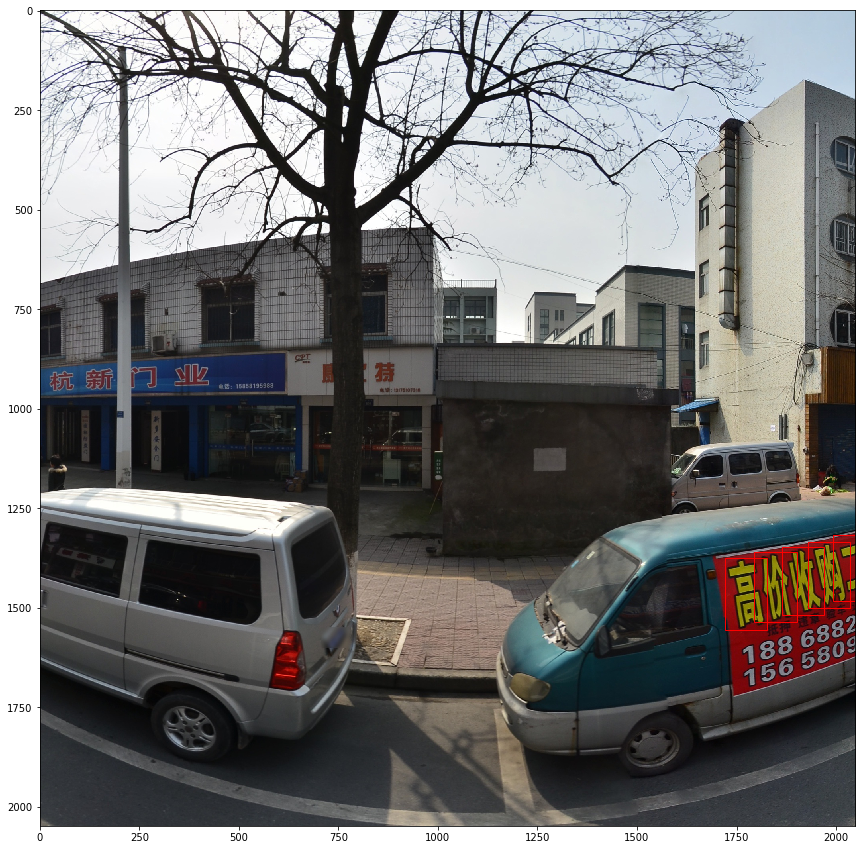

In [76]:
fig,ax = plt.subplots(1,figsize=(15,15))
im = np.array(Image.open(pic_loc), dtype=np.uint8)
ax.imshow(im)
for anno in test_dic["annotations"][6]:
    if not anno["is_chinese"]:
        continue
    else:
        x,y,w,h = poly2bbox(anno["polygon"],2048)
        rect = patches.Rectangle((x*2048,y*2048),w*2048,h*2048,linewidth=1,edgecolor='r',facecolor='none')
        ax.add_patch(rect)
plt.show()